# Estacionariedade

## Importações

In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

## Autocorrelação na mão

### Funções

In [20]:
def autocovariance(df, column, lag: int = 0):
    df = df.copy()
    mean = df[column].mean()
    n = df[column].count()
    if lag != 0:
        df['lag'] = df[column].shift(lag)
    else:
        df['lag'] = df[column]
    df = df.dropna()
    df['product'] = (df[column]-mean)*(df['lag']-mean)
    return df['product'].sum()/n

def autocorrelation(df, column, lag):
    auto = autocovariance(df, column, lag)
    var = autocovariance(df, column, 0)
    print('auto: ', auto)
    print('var: ', var)
    return auto/var

### DF

In [21]:
df = pd.read_excel('data.xlsx').loc[:, 'Estacionária':]
df

,Estacionária,Não Estacionária
0,0.496714,-1.415371
1,-0.138264,-1.836016
2,0.647689,-2.178731
3,1.523030,-2.981008
4,-0.234153,-3.142294
...,...,...
95,-1.463515,4.045353
96,0.296120,3.161495
97,0.261055,3.315220
98,0.005113,3.373429


### Plot da série

In [22]:
px.line(df, df.index, 'Estacionária')

In [23]:
px.line(df, df.index, 'Não Estacionária')

### Cálculo da autocorrelação

In [24]:
stationary = []
non_stationary = []
for lag in range((int(df['Estacionária'].count())//4)+1):
    print('lag: ', lag)
    stationary.append(autocorrelation(df, 'Estacionária', lag))
    non_stationary.append(autocorrelation(df, 'Não Estacionária', lag))

correlation_df = pd.DataFrame({'stationary': stationary, 'non_stationary': non_stationary})

lag:  0
auto:  0.8165221946938584
var:  0.8165221946938584
auto:  6.737266619888378
var:  6.737266619888378
lag:  1
auto:  -0.01756132203705909
var:  0.8165221946938584
auto:  6.260594447684851
var:  6.737266619888378
lag:  2
auto:  -0.03323474989471234
var:  0.8165221946938584
auto:  5.8481316883613
var:  6.737266619888378
lag:  3
auto:  -0.01856478916202246
var:  0.8165221946938584
auto:  5.475873000712662
var:  6.737266619888378
lag:  4
auto:  -0.044770631948214824
var:  0.8165221946938584
auto:  5.081330334931988
var:  6.737266619888378
lag:  5
auto:  0.15849138700346882
var:  0.8165221946938584
auto:  4.843733774984704
var:  6.737266619888378
lag:  6
auto:  -0.01842422218091736
var:  0.8165221946938584
auto:  4.613339928954355
var:  6.737266619888378
lag:  7
auto:  -0.0006308560344241075
var:  0.8165221946938584
auto:  4.311205003536335
var:  6.737266619888378
lag:  8
auto:  -0.10263505384816585
var:  0.8165221946938584
auto:  3.933870044725866
var:  6.737266619888378
lag:  9
auto

In [25]:
correlation_df

,stationary,non_stationary
0,1.000000,1.000000
1,-0.021507,0.929248
2,-0.040703,0.868027
3,-0.022736,0.812774
4,-0.054831,0.754212
5,0.194105,0.718946
6,-0.022564,0.684749
7,-0.000773,0.639904
8,-0.125698,0.583897
9,0.000700,0.534192


### Plot na mão

In [28]:
fig = px.scatter(correlation_df, correlation_df.index, 'stationary')
fig.update_traces(mode="markers+lines")
fig.show()

In [29]:
fig = px.scatter(correlation_df, correlation_df.index, 'non_stationary')
fig.update_traces(mode="markers+lines")
fig.show()

### ACF

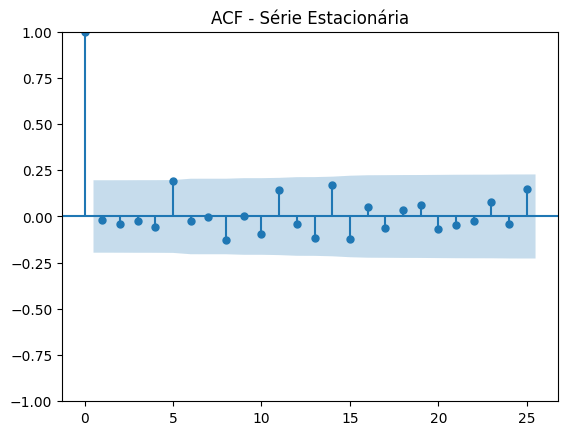

In [38]:
plt.Figure(figsize=(100, 40))
plot_acf(df['Estacionária'], lags=25, title='ACF - Série Estacionária')
plt.show()

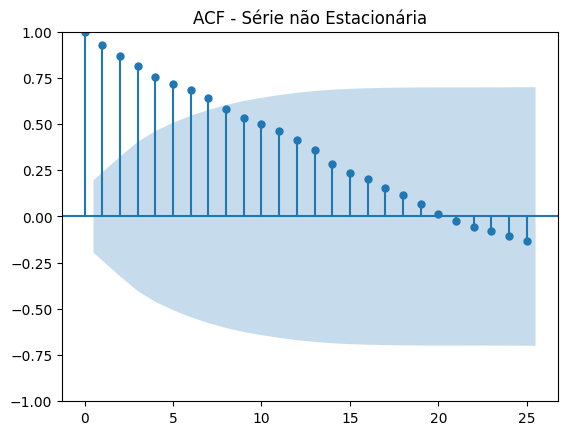

In [39]:
plt.Figure(figsize=(10, 4))
plot_acf(df['Não Estacionária'], lags=25, title='ACF - Série não Estacionária')
plt.show()

## Teste de hipótese
p <= 0.05 -> rejeita H0
<br/>
p > 0.05 -> não rejeita H0

### ADF
H0: não estacionária
<br/>
H1: estacionária